*Decadal wildfire mapping across 5 of Climate Action Reserve's Forest Type/Ecoregions*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('data/Fire Stats 2012-2021 by CAR Forest Type Region - All.csv')
df.head()

In [ ]:
df.dtypes

In [ ]:
df.iloc[0]

In [ ]:
sns.lmplot(x='fireyr_int', y='sum_acres', hue='Region', data=df)
plt.show()

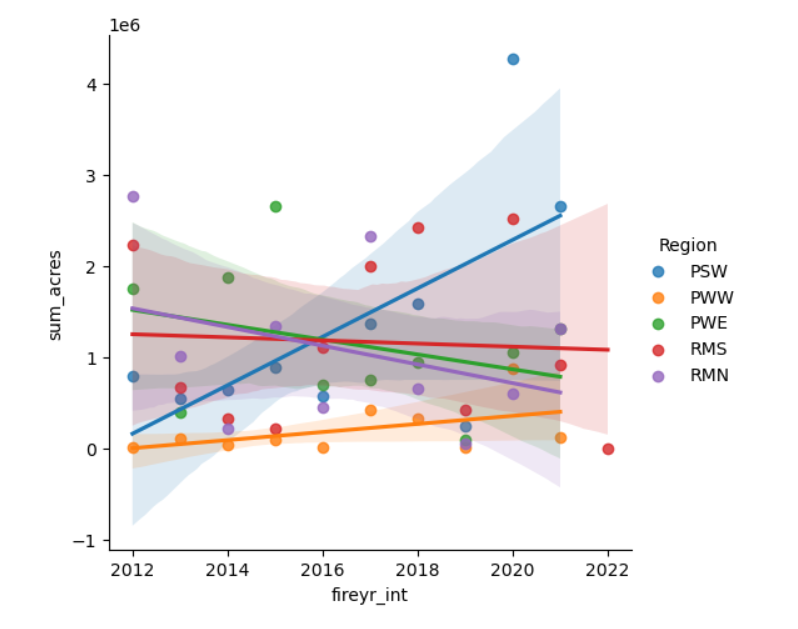

In [ ]:
g = sns.FacetGrid(df, col='Region', col_wrap=3, height=4)
g.map(sns.regplot, 'fireyr_int', 'sum_acres')
plt.show()

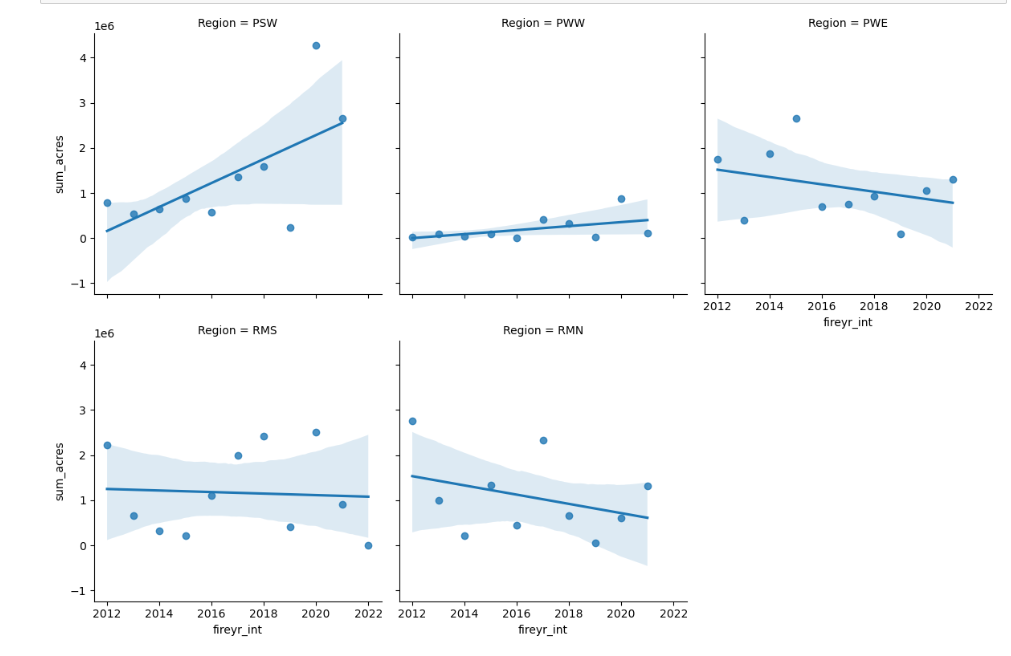

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.labelcolor': 'orange', 'text.color': 'orange', 'xtick.color': 'orange', 'ytick.color': 'orange'})

g = sns.FacetGrid(df[df['Region'] == 'PSW'], height=6)
g.map(sns.regplot, 'fireyr_int', 'sum_acres', color='orange')
g.set_axis_labels('Year', 'Sum of Annual Fires (Millions of Acres)')
g.set(title='PSW Fire Growth Over the Decade', alpha=0.0) # set alpha to 1.0 for no transparency

# Calculate and print the slope of the trendline
x = df[df['Region'] == 'PSW']['fireyr_int']
y = df[df['Region'] == 'PSW']['sum_acres']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope of the trendline:', slope)

plt.savefig('/Users/jakoblarson/Scripts/data/psw_fire_growth.png', transparent=True)

In [ ]:
df_ak = pd.read_csv('data/AK_byYear.csv')

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.labelcolor': 'orange', 'text.color': 'orange', 'xtick.color': 'orange', 'ytick.color': 'orange'})

g = sns.FacetGrid(df_ak[df_ak['Region'] == 'PSW'], height=6)
g.map(sns.regplot, 'fireyr_int', 'sum_acres', color='orange')
g.set_axis_labels('Year', 'Sum of Annual Fires (Millions of Acres)')
g.set(title='PSW Fire Growth Over the Decade', alpha=0.0) # set alpha to 1.0 for no transparency

# Calculate and print the slope of the trendline
x = df[df['Region'] == 'PSW']['fireyr_int']
y = df[df['Region'] == 'PSW']['sum_acres']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope of the trendline:', slope)

plt.savefig('/Users/jakoblarson/Scripts/data/psw_fire_growth.png', transparent=True)

In [ ]:
# Define region mapping
region_map = {
    'PSW': 1,
    'PWW': 2,
    'PWE': 3,
    'RMS': 4,
    'RMN': 5
}

# Convert Region column to integer values
df['Region_int'] = df['Region'].map(region_map)

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
sns.pairplot(df)
plt.show()

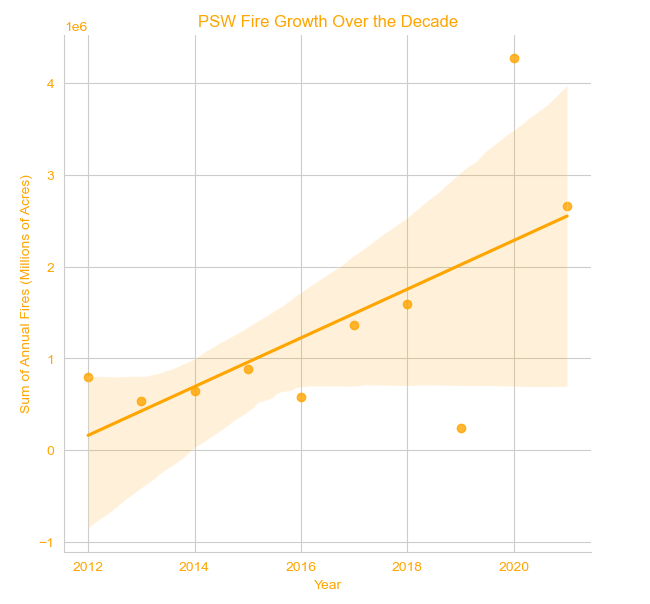

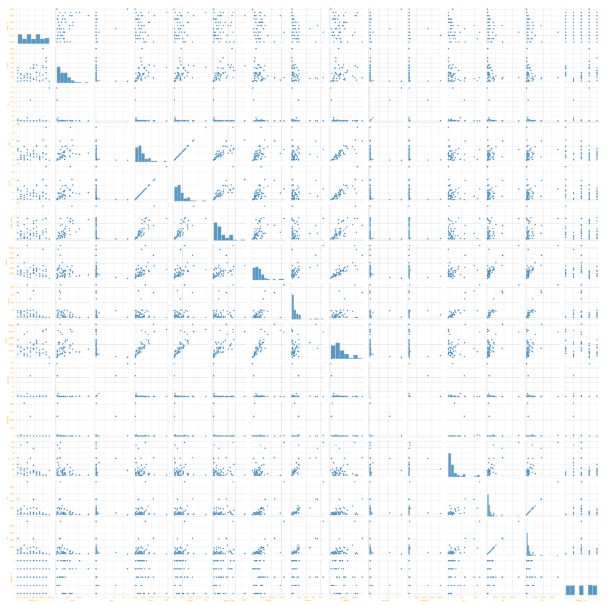

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

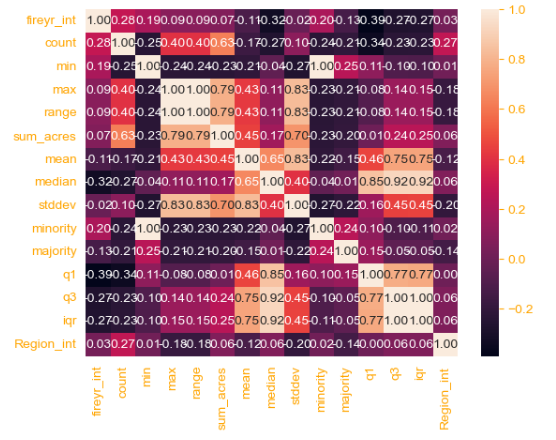

In [ ]:
df_psw = pd.read_csv('data/PSW_NIFCFires.csv')
df_pww = pd.read_csv('data/PWW_NIFCFires.csv')
df_pwe = pd.read_csv('data/PWE_NIFCFires.csv')
df_rms = pd.read_csv('data/RMS_NIFCFires.csv')
df_rmn = pd.read_csv('data/RMN_NIFCFires.csv') 

In [ ]:
df_psw.head()

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
plt.figure()
plt.scatter(df_psw['fireyr_int'], df_psw['GIS_Ac'])
plt.xlabel('Fire Year')
plt.ylabel('Fire Size (Acres)')
plt.title('PSW Fire Events 2012-2021')
plt.show()

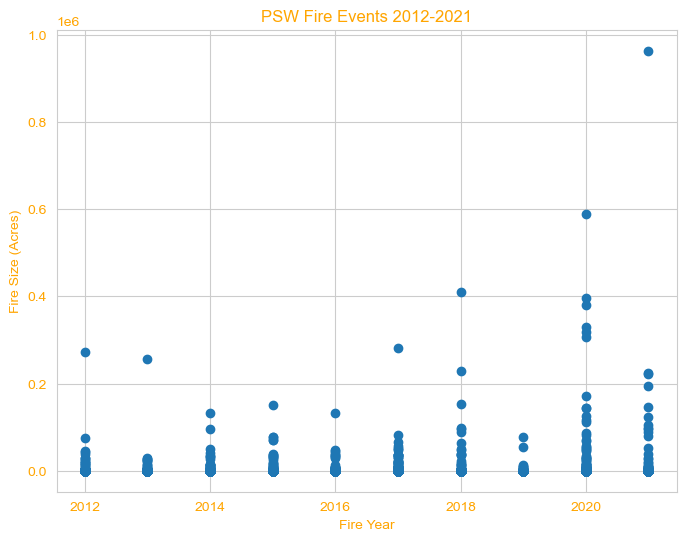

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
plt.figure()
plt.scatter(df_pww['fireyr_int'], df_pww['GIS_Ac'])
plt.xlabel('Fire Year')
plt.ylabel('Fire Size (Acres)')
plt.title('PWW Fire Events 2012-2021')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
plt.figure()
plt.scatter(df_pwe['fireyr_int'], df_pwe['GIS_Ac'])
plt.xlabel('Fire Year')
plt.ylabel('Fire Size (Acres)')
plt.title('PWE Fire Events 2012-2021')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
plt.figure()
plt.scatter(df_rms['fireyr_int'], df_rms['GIS_Ac'])
plt.xlabel('Fire Year')
plt.ylabel('Fire Size (Acres)')
plt.title('RMS Fire Events 2012-2021')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 6.0) #setting figure size
plt.figure()
plt.scatter(df_rmn['fireyr_int'], df_rmn['GIS_Ac'])
plt.xlabel('Fire Year')
plt.ylabel('Fire Size (Acres)')
plt.title('RMN Fire Events 2012-2021')
plt.show()

In [ ]:
df_allfires = pd.read_csv('data/NIFC_2012-2021_WithCARRegions.csv')

In [ ]:
df_allfires.dtypes

In [ ]:
df_allfires.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='count', y='sum_acres', hue='Region', alpha=0.8)
sns.regplot(data=df, x='count', y='sum_acres', scatter=False, color='black')
plt.show()

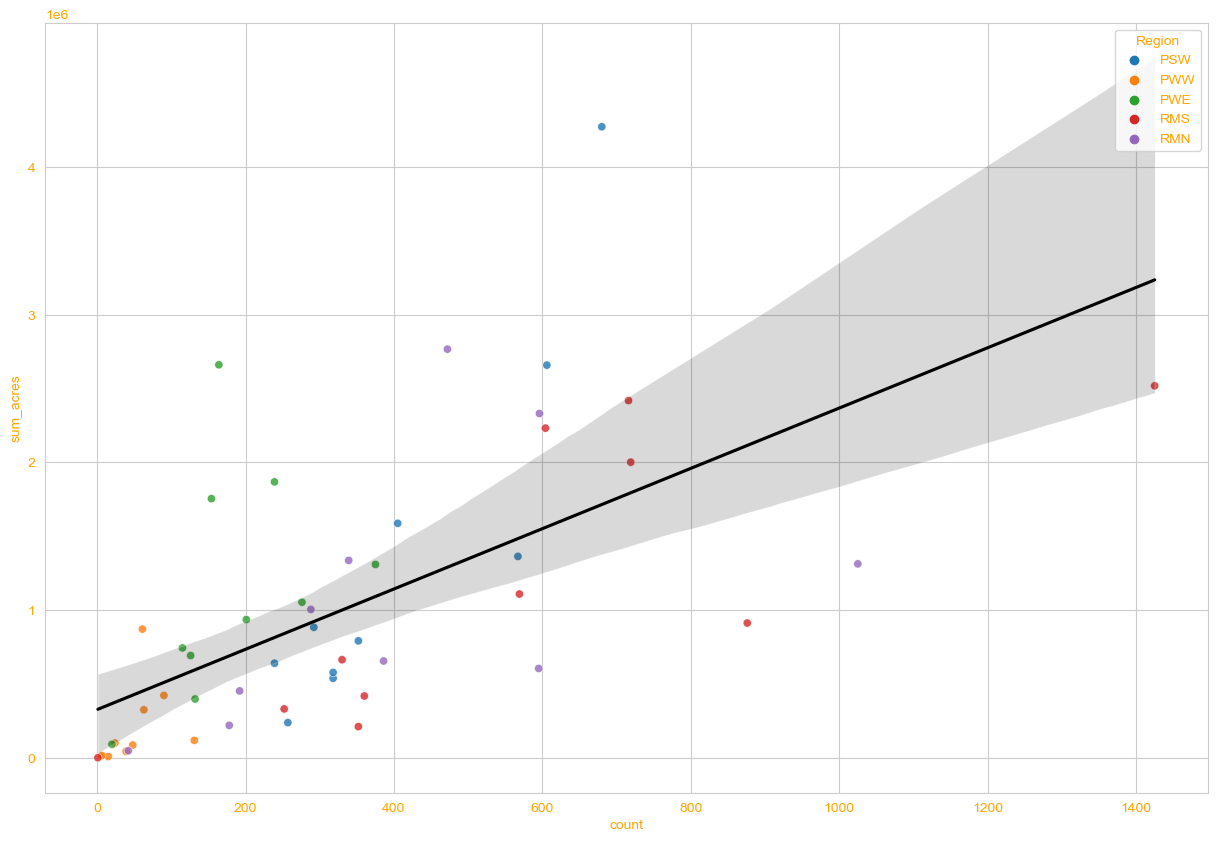

*This is a pro-bono consulting project I completed to help the Marketing Team at Rebel Athletic determine their carbon emission as a result of shipping their products throughout the country, and the impact they would have be transitioning to a virtual program to eliminate these shipping impacts.*

To determine the impact of Rebel Athletic's Fit Freedom Program for 2022, we are assuming that a semi truck at an average fuel economy of 6.5 mpg, consuming standard gasoline is conducting all of the transport.

The source data for this analysis can be found here, provided by the EPA: https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle#:~:text=Every%20gallon%20of%20gasoline%20burned%20creates%20about%208%2C887%20grams%20of%20CO2.

At it's core however, this is what we are after:

To calculate the metric tons of CO2 produced by a vehicle that burns 1 gallon of gasoline every 6.5 miles, we need to know the CO2 emissions rate of the gasoline.

Assuming an emissions rate of 8,887 grams of CO2 per gallon of gasoline, we can calculate the CO2 emissions per mile:

8,887 g CO2/gallon of gasoline ÷ 1000 g/kg = 0.008887 metric tons CO2/gallon of gasoline

(0.008887 metric tons CO2/gallon of gasoline) ÷ (3.7854 L/gallon) = 0.002349 metric tons CO2/L

0.002349 metric tons CO2/L ÷ (6.5 miles/gallon × 0.264172 L/gallon) = 0.001373 metric tons CO2/mile

Therefore, for every mile traveled by the vehicle, approximately 0.001373 metric tons of CO2 are produced.

Metrics:

266,996 miles driven due to round trip shipping of Fit Kits
6.5 mpg of a semi truck
Volume of a semi truck = 53' x 10' x 7' = 3,710 cubic feet
164.5 boxes shipped in 2022 at a size of 16" x 16" x 10" = 2,560 cubic inches
1,728 cubic inches in a cubic foot, therefore, 2,560 cubic inches / 1,728 = 1.48148 cubic feet per box
1.48148 * 164.5 = 243.70346 total cubic feet of material shipped
243.70346 cubic feet of Fit Kits / 3,710 cubic foot volume of a semi truck = 0.06568826 or 6.568826% the capacity of a semi truck
To calculate the number of metric tons of CO2 produced over 266,996 miles, we need to know how many gallons of gasoline were burned.

Assuming the vehicle burns 1 gallon of gasoline every 6.5 miles, we can divide the total number of miles (266,996) by 6.5 to get the total number of gallons of gasoline burned:

266,996 miles ÷ 6.5 miles/gallon = 41,076.31 gallons of gasoline

Next, we can multiply the number of gallons of gasoline by the CO2 emissions per gallon, which is 8.887 × 10^-3 metric tons CO2/gallon of gasoline:

41,076.31 gallons × 8.887 × 10^-3 metric tons CO2/gallon = 365.25 metric tons of CO2

Therefore, over 266,996 miles, approximately 365.25 metric tons of CO2 would be produced.

To determine the impact of the Fit Freedom program we will caluculate the emssions impact of 1 semi truck driving the total miles driven as a result of this program (266,996 miles) at a mpg of 6.5 * 6.568826% to yield the total impact

**Which means that the total carbon emissions from the semi truck over 266996.0 miles is approximately 365.25 metric tons of CO2, and 6.568826% of that is:**

**23.992637 tons of CO2e emissions generated as a result of shipping Fit Kits as a product of the Fit Freedom Program**


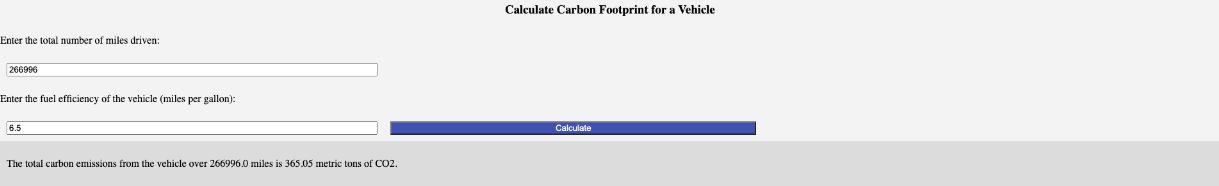

In [ ]:
import dash
from dash import Dash
from dash import html
from dash import dcc

app = dash.Dash()

app.layout = html.Div(style={'backgroundColor': '#F3F3F3'}, children=[
    html.H3("Calculate Carbon Footprint for a Vehicle", style={'textAlign': 'center', 'padding': '10px'}),
    html.Div([
        html.P("Enter the total number of miles driven: "),
        dcc.Input(id="total_miles", type="text", style={'width': '30%', 'margin': '10px'})
    ]),
    html.P("Enter the fuel efficiency of the vehicle (miles per gallon): "),
    dcc.Input(id="mpg", type="text", style={'width': '30%', 'margin': '10px'}),
    html.Button("Calculate", id="button", style={'backgroundColor': '#3F51B5', 'color': 'white', 'width': '30%', 'margin': '10px'}),
    html.Br(),
    html.Div(id="result", style={'backgroundColor': '#DCDCDC', 'padding': '10px'})
])

@app.callback(
    dash.dependencies.Output("result", "children"),
    [dash.dependencies.Input("button", "n_clicks")],
    [dash.dependencies.State("total_miles", "value"),
     dash.dependencies.State("mpg", "value")]
)
def update_output(n_clicks, total_miles, mpg):
    grams_co2_per_gallon_gasoline = 8887
    metric_ton_per_gram = 1e-6
    
    total_miles_driven = float(total_miles)
    fuel_efficiency = float(mpg)
    gallons_of_gasoline = total_miles_driven / fuel_efficiency
    total_co2_emitted = gallons_of_gasoline * grams_co2_per_gallon_gasoline * metric_ton_per_gram

    return html.Div([
    html.P("The total carbon emissions from the vehicle over {} miles is {:.2f} metric tons of CO2.".format(total_miles_driven, total_co2_emitted))
])

if __name__ == "__main__":
    app.run_server()

*This is a writing assistant I made inspired by the ongoing traction with Chat GPT*

In [ ]:
#import dependencies
from dash import Dash, dcc, html, Input, Output, State, callback_context
import dash_bootstrap_components as dbc
import plotly.express as px
from transformers import AutoTokenizer, AutoModelForCausalLM
from readability import Readability
import nltk

tokenizer = AutoTokenizer.from_pretrained("gpt2-large")

model = AutoModelForCausalLM.from_pretrained("gpt2-large")

gen_text_list = []
exv = 0

#create an input field
def textareas():
    return html.Div([ 
            dbc.Textarea(id = 'my-input'
                , size="lg"
                , placeholder="Enter text for auto completion")
            , dbc.Button("Submit"
                , id="gen-button"
                , className="me-2"
                , n_clicks=0)
            ])


#instantiate dash
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
#create layout
app.layout = html.Div([dbc.Container([
        html.H1("Jakob's Writing Assistant")
        , html.Br()
        , html.H3("Enter a prompt")
        , textareas()
        , html.Br()
        , html.Br()
        , html.H3("Generated Text")
        , html.Div(id='readability-score')
        , html.Div(id='my-output')
        , dbc.Button("Expand", id="expand-button", className="me-2", n_clicks=0)
        , dbc.Button("Clear", id="clear-button", className="me-2", n_clicks=0)
        
   ])
  ])

@app.callback(
    Output(component_id='my-output', component_property='children'),
    Output(component_id = 'readability-score', component_property='children'),
    Input(component_id='gen-button', component_property='n_clicks'),
    Input(component_id='expand-button', component_property='n_clicks'),
    Input(component_id='clear-button', component_property='n_clicks'),
    State(component_id='my-input', component_property='value')    
)
def update_output_div(gen, ex, cl, input_value):
    gen_text = ""
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    global gen_text_list
    global exv
    score = ''
    if 'gen-button' in changed_id:
        
        if input_value is None or input_value == "":
            input_value = ""
            gen_text = ""

        else:
            
            input_ids = tokenizer(input_value, return_tensors="pt").input_ids

            gen_tokens = model.generate(
                input_ids,
                do_sample=True,
                temperature=0.9,
                max_length=100,
            )
            gen_text = tokenizer.batch_decode(gen_tokens)[0]
            
            gen_text_list.append(gen_text)

            if len(gen_text.strip().split(" ")) >100:
                print(len(gen_text))
                r = Readability(gen_text)
                fk = r.flesch_kincaid()
                score = fk.score
                
            else: 
                score = 'Not 100 tokens'
    
    if 'expand-button' in changed_id:

        if len(gen_text_list) > 0:
            MAX_LENGTH = 100 + 100*(exv+1)
            input_ids = tokenizer(gen_text_list[exv], return_tensors="pt").input_ids

            gen_tokens = model.generate(
                input_ids,
                do_sample=True,
                temperature=0.9,
                max_length=MAX_LENGTH,
            )
            gen_text = tokenizer.batch_decode(gen_tokens)[0]
           
            gen_text_list.append(gen_text)
            exv+=1
        
            if len(gen_text.strip().split(" ")) >100:
                print(len(gen_text))
                r = Readability(gen_text)
                fk = r.flesch_kincaid()
                score = fk.score
                
            else: 
                score = 'Not 100 tokens'


        else:
            html.P("no text has been generated")

    if 'clear-button' in changed_id:
        gen_text = ''
        exv = 0
        gen_text_list = []
    
    return html.P(gen_text), html.P(f"Readability Score: {score}")


    

#run app server
if __name__ == '__main__':
    app.run_server()

*This next section is a Notebook I made in collaboration with a colleague while working at the Los Angeles Economic Development Corporation. We purchased foot-traffic data from a data provider and needed to download the data from our AWS s3, and parse that information in order to have more readily usable information.*

*some information has been deleted to protect LAEDC's IP

In [ ]:
#import boto3
import boto3
#import os.path for directory navigation/creation
import os
#import pandas for dataframe access and manipulation
import pandas as pd
#import gzip to unzip files
import gzip
#import plotly for graphs
import plotly.express as px
#import tqdm for loading
from tqdm import tqdm
#import datetime for working with datetime object
import datetime
#import plotly for graphing
import plotly.express as px

#INSERT YOUR FILE PATH HERE#
f_path = ""

ACCESS_KEY = ''
SECRET_KEY = ''

#create an AWS session object
session = boto3.session.Session(aws_access_key_id=ACCESS_KEY,
                  aws_secret_access_key=SECRET_KEY,
                  region_name = '')

#with our AWS client load S3 and resources
s3 = session.client('s3')
s3_resource = session.resource('s3')

#list all files in our S3 buckets
keys_list_core_poi = []
keys_list = []

for bucket in s3_resource.buckets.all():
    print("Bucket: "+ bucket.name)
    for bucket_object in bucket.objects.all():
        #if the file is not a success file...
        if bucket_object.key[-7:] != "SUCCESS":
            #use .key to print the keys only (not the buckets)
            #print(bucket_object.key)
            keys_list.append(bucket_object.key)

            #append to a list of keys if it is a core pattern
            if "core_poi-pattern" in bucket_object.key:
                keys_list_core_poi.append(bucket_object.key)
                print(bucket_object.key)
                
#create a function which doownloads the data we want and return a pandas dataframe object
def download_s3_file(bucket_name, object_name):
    global f_path
    #create a file name based on the S3 bucket directory
    file_name = f_path+object_name

    #remove the file name to test if the directory is there
    dir = "/".join(file_name.split("/")[:-1])

    #check to see if the directory exists, if it does not, create the directory
    if not os.path.exists(dir):
        os.makedirs(dir)

    #if the file exists, don't download the file
    if os.path.exists(file_name):
        pass
    #otherwise download the file
    else:
        s3.download_file(bucket_name, object_name, file_name)
    

#choose the bucket and object we want to download and download the file
for i in tqdm(keys_list_core_poi):
    temp = download_s3_file("laedc-data",i)
    
#define a functiton to subset our data
def subset_data(df,company = "", naics = ""):
    if company != "":
        subset_df = df[df["location_name"] == company]
    elif naics != "":
        df["naics_code"] = df["naics_code"].astype(str)
        subset_df = df[df["naics_code"].str.startswith(naics, na=False)]
    else:
        print("ERROR: NO COMPANY OR NAICS GIVEN")

    subset_df = subset_df[subset_df['visits_by_day'].notna()]

    return subset_df

#define a function to get the week of the data from the file name
def get_week(f_name):
    f_name = f_name.replace("\\","/")
    if len(f_name.split("/")[-4:-1][0]) == 4:
        return "/".join(f_name.split("/")[-4:-1]).replace("/","_")
    elif len(f_name.split("/")[-4:-1][0]) == 2:
        return "/".join(f_name.split("/")[-5:-2]).replace("/","_")
    else:
        print("LENGTH ERROR IN FILENAME")
        return None

    def company_visits(df):
    #Dataset week starts on Monday, create variables to track the visits per day
    Monday = 0
    Tuesday = 0
    Wednesday = 0
    Thursday = 0
    Friday = 0
    Saturday = 0
    Sunday = 0

    #iterate through the rows (stores) and count the visits for each day
    for row in df.itertuples():
        list = row[29]
        list = list.replace("[","")
        list = list.replace("]","")
        list = list.split(",")

        #add the visits to our variables from earlier
        Monday += int(list[0])
        Tuesday += int(list[1])
        Wednesday += int(list[2])
        Thursday += int(list[3])
        Friday += int(list[4])
        Saturday += int(list[5])
        Sunday += int(list[6])

    #create an empty list for the days of the week
    week_days = []
    #get the first day of the week we are looking for
    first_day = pd.to_datetime(df["date_range_start"].iloc[0])
    #add all of the days of the week to the week list
    for day in range(0,7):
        week_days.append(first_day + datetime.timedelta(days=day))

    #create a dataframe of our visit values and return the dataframe
    week_df = pd.DataFrame({"Visits" : [Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday],"Days" : week_days})

    return week_df

def get_selected_naics_data(naics_code):
    global f_path
    naics_csvs = f_path+"detailed_naics_csvs/"+naics_code+"/"

    #create a list of dataframes
    list_of_dfs = []

    for subdir, dirs, files in os.walk(naics_csvs):
        for file in files:
            #load in the dataframes and add them to a list of dfs
            list_of_dfs.append(pd.read_csv(naics_csvs+file))

        return list_of_dfs

def get_selected_industry_data(industry):
    global f_path
    file_name = f_path+"/industry_summary_csvs/"+industry+".csv"

    return pd.read_csv(file_name)

def read_file(file_path):
    if file_path[-3:] == "csv":
        #read in csv
        return pd.read_csv(file_path)
    elif file_path[-2:] == "gz":
        with gzip.open(file_path) as f:
            return pd.read_csv(f)
    else:
        print(file_path+" cannot be read!")
        return
    
# we then defined the industries of focus and created a dictionary for them

# This block creates the detailed (weekly) visit files for all selected industries

rootdir = f_path+"weekly"
file_list = []

#loop through all the files in the directory
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file_list.append(str(os.path.join(subdir, file)))

#iterate through the files
for file_name in tqdm(file_list):
    df = read_file(file_name)
    for industry in selected_industries_dict.keys():
        df_list = []
        for code in selected_industries_dict[industry].keys():
            naics_path = f_path+"detailed_naics_csvs/"+code+"/"+get_week(file_name)+".csv"
            #check to see if the path already exists, if it does we do not need to recreate the file
            if not os.path.exists(naics_path):
                #subset the data based on the naics code we want
                subset_temp = subset_data(df = df, company = "", naics = code)
                #if we have data (if the length of the dataframe is greater than 0)
                if len(subset_temp) > 0:
                    if not os.path.exists(f_path+"detailed_naics_csvs/"+code+"/"):
                        os.makedirs(f_path+"detailed_naics_csvs/"+code+"/")
                    #write the data to a csv
                    subset_temp.to_csv(naics_path, index = False)
                    #add the data to the df list
                    df_list.append(subset_temp)
                #if we dont have data, append an error message
                else:
                    print("\nERROR: NAICS CODE "+code+" NOT TRACKED BY dataset IN WEEK: "+get_week(file_name))
                    TimeoutError

        #check to see if the industry CSV has already been made for the week. If it has then we have no need to recreate it.
        industry_path = f_path+"detailed_industry_csvs/"+industry+"/"
        if not os.path.exists(industry_path+get_week(file_name)+".csv"):
            #concatinate all the data
            total_industry_df = pd.concat(df_list)
            #print an error message if the length is 0
            if len(total_industry_df) == 0:
                print("ERROR: File:"+file_name+"\nInudustry: "+industry+"\n WHILE MAKING THE INDUSTRY CSV FILE")
                TimeoutError
            #export each industry to a csv
            if not os.path.exists(industry_path):
                        os.makedirs(industry_path)
            total_industry_df.to_csv(industry_path+get_week(file_name)+".csv")
            
# This block creates industry CSVs for the selected industries in the dictionary provided above. These summary files provide visits for each week in one CSV

for key in tqdm(selected_industries_dict.keys()):
    csv_file = f_path+"industry_summary_csvs/"+key+".csv"
    total_industry_visits = {}
    for code in selected_industries_dict[key]:
        #print("\nLoading the data for NAICS CODE "+code+":\n")
        temp_dfs = get_selected_naics_data(code)

        #create a lists of visits
        temp_visits_list = []

        #print("\nGetting the Number of Visits:\n")
        for df in temp_dfs:
            temp_visits_list.append(company_visits(df))


        #print("\nConcatenating the visits list and creating a dictionary entry\n")
        temp_visits_df = pd.concat(temp_visits_list, ignore_index= True)
        #start after Jan 12 because data prior to this day is messed up
        temp_visits_df = temp_visits_df[temp_visits_df["Days"] > pd.to_datetime("01-13-2019", utc = True)]
        temp_visits_df.drop_duplicates(subset = "Days", ignore_index = True, inplace = True)
        temp_visits_df.sort_values(by='Days', ascending = True, ignore_index= True, inplace = True)

        total_industry_visits[code] = temp_visits_df

    #create a new temporary list variable
    temp = []

    #iterate through they keys and add to our lists
    for i in total_industry_visits.keys():
        temp.append(total_industry_visits[i])

    #combine the list into a new dataframe and use groupby to sum the data
    combined = pd.concat(temp, ignore_index= True)
    combined = combined.groupby(by="Days", as_index= False).sum()

    #create a new dictionary entry for the industry totals
    total_industry_visits["Industry Total"] = combined

    #save for faster loading
    temp_list = list(total_industry_visits.keys())
    industry_dict = {}
    industry_dict["Date"] = combined["Days"]
    #iterate through they keys and grab the visits column
    for i in temp_list:
        industry_dict[i] = total_industry_visits[i]["Visits"]
    industry_df = pd.DataFrame(industry_dict)

    #export to csv
    industry_df.to_csv(csv_file, index = False)

*This code was designed to generate orthophotos using a DEM and original aerial 
photography, given the transformation from the ground space to the image space.* 

*Input: one original image file name, one DEM file name, one transformation file 
name in ASCII, and one output file name
Output: one othorphoto stored in the output file*

In [ ]:
import gdal
import gdalconst
import numpy
import sys
import math

Original_Image = r"C:\ArcGIS\Classes\Remote Sensing\Labs\Lab 11\RE_AXM_045_083.tif"
DEM = r"C:\ArcGIS\Classes\Remote Sensing\Labs\Lab 11\dem_045_083_1m_sub_m.img"
Text = r"C:\ArcGIS\Classes\Remote Sensing\Labs\Lab 11\RFM_045_083_1.txt"
Out_Image = r"C:\ArcGIS\Classes\Remote Sensing\Labs\Lab 11\OrthoImage.img"

#read the parameters and interpret/convert the parameters to the correct format

#register the image/raster input
gdal.AllRegister()
Original_rasterIn = gdal.Open(Original_Image, gdalconst.GA_ReadOnly)
DEM_rasterIn = gdal.Open(DEM, gdalconst.GA_ReadOnly)

if Original_rasterIn is None:
    print ("Cannot access the file.\n")
    sys.exit(0)

if DEM_rasterIn is None:
    print ("Cannot access the file.\n")
    sys.exit(0)

print("Read the images")

#project and transform the original image data
Original_projectionfrom = Original_rasterIn.GetProjection()
Original_geotransform = Original_rasterIn.GetGeoTransform()

#define rows, columns, and bands in the original image to be referred back to
numCols = Original_rasterIn.RasterXSize
numRows = Original_rasterIn.RasterYSize
bands = Original_rasterIn.RasterCount

#project and transform the DEM data
DEM_projectionfrom = DEM_rasterIn.GetProjection()
DEM_geotransform = DEM_rasterIn.GetGeoTransform()

#define rows, columns, and bands in the DEM data to be referred back to
DEM_numCols = DEM_rasterIn.RasterXSize
DEM_numRows = DEM_rasterIn.RasterYSize
DEM_bands = DEM_rasterIn.RasterCount

print("Projected, transformed, and defined image data")

#read and interpret text file
RMF_Text = open(Text, mode = 'r')
RMF_Str = RMF_Str = RMF_Text.readline()
RMF_CoEf = RMF_CoEf = {}

#split the text values at the "="
for line in RMF_Text:
    CoEf = line.split('=')
    RMF_CoEf[CoEf[0]] =  float(CoEf[1])

for key, value in RMF_CoEf.items():
    globals()[key] = value

print("Read the text file")
print(RMF_CoEf)

#Matrices
Original_Image_mat = numpy.zeros((numRows,numCols),dtype = numpy.float)
DEM_mat = numpy.zeros((DEM_numRows, DEM_numCols), dtype = numpy.float)
Out_Image_mat = numpy.zeros((DEM_numRows, DEM_numCols), dtype = numpy.float)
DEM_mat[:,:] = DEM_rasterIn.GetRasterBand(1).ReadAsArray(0, 0 ,DEM_numCols, DEM_numRows)
Original_Image_mat[:,:] = Original_rasterIn.GetRasterBand(1).ReadAsArray(0, 0, numCols, numRows)

print("Initiated matrices")

for irow in range(DEM_numRows):
    for icol in range(DEM_numCols):
        #establish prime valves
        Xp = DEM_geotransform[0] + DEM_geotransform[1] * icol
        Yp = DEM_geotransform[3] + DEM_geotransform[5] * irow
        Zp = DEM_mat[irow, icol]

        #Established reference values
        X = (Xp - xOffset) / xScale
        Y = (Yp - yOffset) / yScale
        Z = (Zp - zOffset) / zScale

        #input DLT equation
        x = (a0 + a1*X + a2*Y + a3*Z) / (1 + c1*X + c2*Y + c3*Z)
        y = (b0 + b1*X + b2*Y + b3*Z) / (1 + c1*X + c2*Y + c3*Z)

        #DLT model equation
        Col = int(round(x*colScale + colOffset))
        Row = int(round(y*rowScale + rowOffset))

        if Row >= 0 and Row < numRows and Col >= 0 and Col < numCols:
            flip_row = (numRows - 1) - Row
            Out_Image_mat[irow, icol] = Original_Image_mat[flip_row, Col]

print()
print("Row, Col = ")
print(Row, Col)
print()

print("DLT Model calculated normalized x,y")

rasterOut = gdal.GetDriverByName("HFA").Create(Out_Image, DEM_numCols, DEM_numRows, 1, gdalconst.GDT_Byte)

rasterOut.SetProjection(DEM_projectionfrom)
rasterOut.SetGeoTransform(DEM_geotransform)

rasterOut.GetRasterBand(1).WriteArray(Out_Image_mat)

rasterOut = None

print("Finished")

*A Google Map API Geocoder Script*

In [ ]:
import pandas as pd
import geopy
from geopy.geocoders import GoogleV3

# Set up geocoder with Google Maps API key
geolocator = GoogleV3(api_key='')

# Read input CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/')

# Define a function to geocode a city and state and return the latitude and longitude
def geocode_city_state(row):
    city = row['City']
    state = row['State']
    location = geolocator.geocode(f"{city}, {state}")
    if location is None:
        return pd.Series({'latitude': None, 'longitude': None})
    else:
        return pd.Series({'latitude': location.latitude, 'longitude': location.longitude})

# Apply the geocoding function to each row of the DataFrame and create new 'latitude' and 'longitude' columns
df[['latitude', 'longitude']] = df.apply(geocode_city_state, axis=1)

# Write updated DataFrame to a new CSV file
df.to_csv('/Users/.csv', index=False)